#### Ex. I

In [6]:
library(tidyverse)
library(MVA)
colName <- c("country", "m0", "m25", "m50", "m75", 
"w0", "w25", "w50", "w75")
dat <- read_table(file = file.choose(), col_names = colName, 
col_types = cols("c", "d", "d", "d", "d", "d", "d", "d", "d"))
print(dat, n = 31)

# A tibble: 31 × 9
   country                 m0   m25   m50   m75    w0   w25   w50   w75
   <chr>                <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Algeria                 63    51    30    13    67    54    34    15
 2 Cameroon                34    29    13     5    38    32    17     6
 3 Madagascar              38    30    17     7    38    34    20     7
 4 Mauritius               59    42    20     6    64    46    25     8
 5 Reunion                 56    38    18     7    62    46    25    10
 6 Seychelles              62    44    24     7    69    50    28    14
 7 South-Africa-(C)        50    39    20     7    55    43    23     8
 8 South-Africa-(W)        65    44    22     7    72    50    27     9
 9 Tunisia                 56    46    24    11    63    54    33    19
10 Canada                  69    47    24     8    75    53    29    10
11 Costa-Rica              65    48    26     9    68    50    27    10
12 Dominican-Rep.          64    50    28    

In [7]:
n <- nrow(dat)
sapply(1:3, function(f) factanal(dat[, -1], factors = f, 
method = "mle")$PVAL)
fact_model1 <- factanal(dat[, -1], factors = 3, method = "mle")
fact_model1
dat %>%
column_to_rownames(var = "country") %>%
factanal(x = ., factors = 3, method = "mle", 
scores = "regression") %>% .$scores %>% round(6) -> scores
print(scores)

objective    objective    objective 
1.879555e-24 1.911514e-05 4.578204e-01


Call:
factanal(x = dat[, -1], factors = 3, method = "mle")

Uniquenesses:
   m0   m25   m50   m75    w0   w25   w50   w75 
0.005 0.362 0.066 0.288 0.005 0.011 0.020 0.146 

Loadings:
    Factor1 Factor2 Factor3
m0  0.964   0.122   0.226  
m25 0.646   0.169   0.438  
m50 0.430   0.354   0.790  
m75         0.525   0.656  
w0  0.970   0.217          
w25 0.764   0.556   0.310  
w50 0.536   0.729   0.401  
w75 0.156   0.867   0.280  

               Factor1 Factor2 Factor3
SS loadings      3.375   2.082   1.640
Proportion Var   0.422   0.260   0.205
Cumulative Var   0.422   0.682   0.887

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 6.73 on 7 degrees of freedom.
The p-value is 0.458 

                       Factor1   Factor2   Factor3
Algeria              -0.258063  1.900958  1.915816
Cameroon             -2.782496 -0.723400 -1.847722
Madagascar           -2.806428 -0.811588 -0.012103
Mauritius             0.141005 -0.290285 -0.858624
Reunion              -0.196352  0.474299 -1.550465
Seychelles            0.367371  0.829024 -0.552141
South-Africa-(C)     -1.028568 -0.080658 -0.654220
South-Africa-(W)      0.946194  0.064004 -0.919953
Tunisia              -0.862494  3.591772 -0.364421
Canada                1.245304  0.295641 -0.273428
Costa-Rica            0.508736 -0.505004  1.013287
Dominican-Rep.        0.106044  0.011112  1.838716
El-Salvador          -0.608156  0.651008  0.488364
Greenland             0.235114 -0.691239 -0.385587
Grenada               0.132008  0.252410 -0.152206
Guatemala            -1.450336 -0.677658  0.659119
Honduras              0.043253 -1.851757  0.306332
Jamaica               0.462125 -0.519185  0.080329
Mexico               -0.052333 

Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


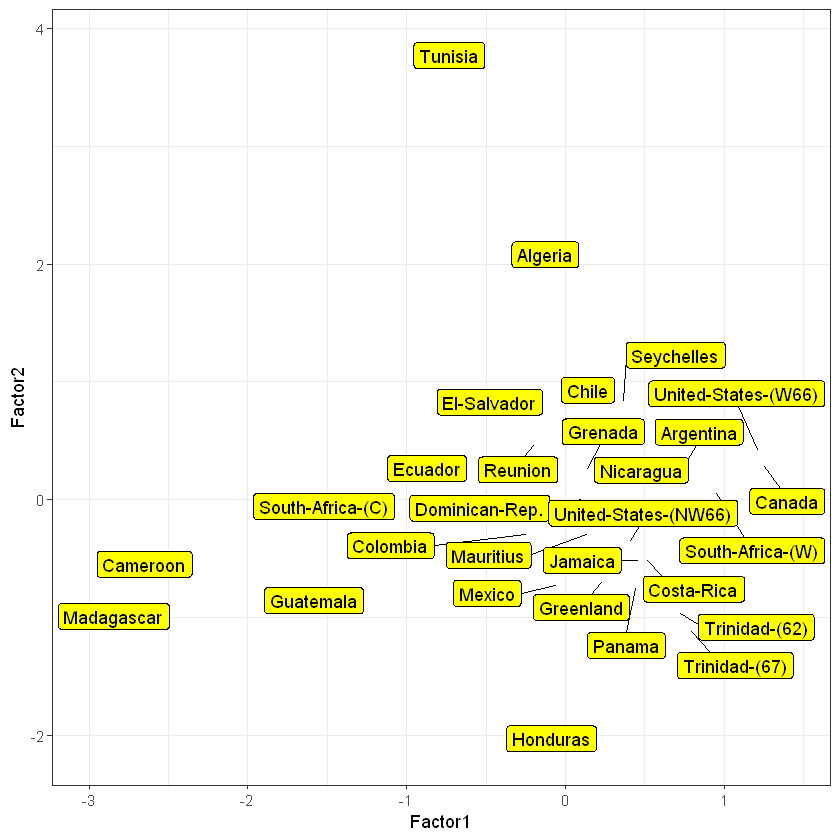

In [8]:
library(ggrepel)
scores %>% as.data.frame  %>% 
mutate(country = dat$country) -> dat_score
dat_score %>%
ggplot() +
geom_label_repel(aes(x = Factor1, y = Factor2, label = country), 
fill = "yellow") + 
coord_cartesian(xlim = extendrange(scores[, 1]), 
ylim = extendrange(scores[, 2])) + 
theme_bw()

Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


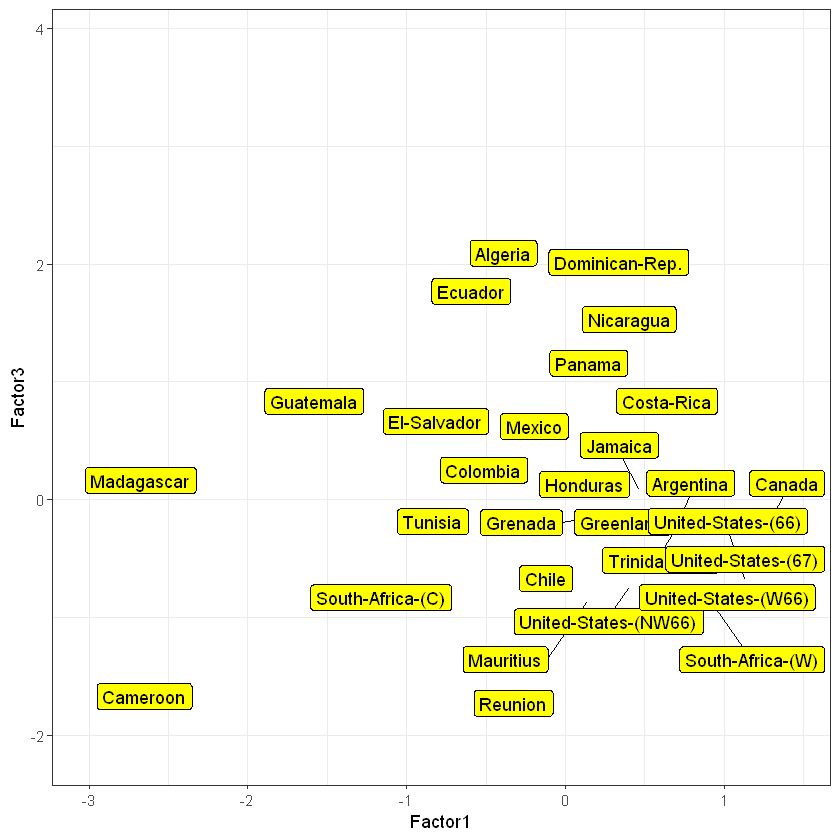

In [9]:
dat_score %>%
ggplot() +
geom_label_repel(aes(x = Factor1, y = Factor3, label = country), 
fill = "yellow") + 
coord_cartesian(xlim = extendrange(scores[, 1]), 
ylim = extendrange(scores[, 2])) + 
theme_bw()

Warning message:
"ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


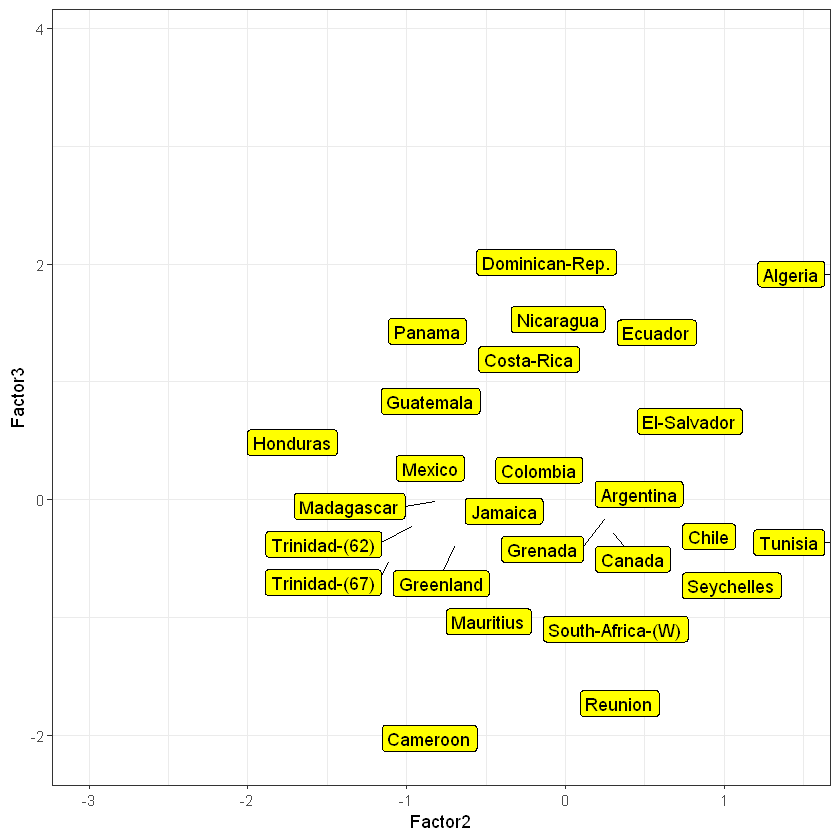

In [10]:
dat_score %>%
ggplot() +
geom_label_repel(aes(x = Factor2, y = Factor3, label = country), 
fill = "yellow") + 
coord_cartesian(xlim = extendrange(scores[, 1]), 
ylim = extendrange(scores[, 2])) + 
theme_bw()


Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."
Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


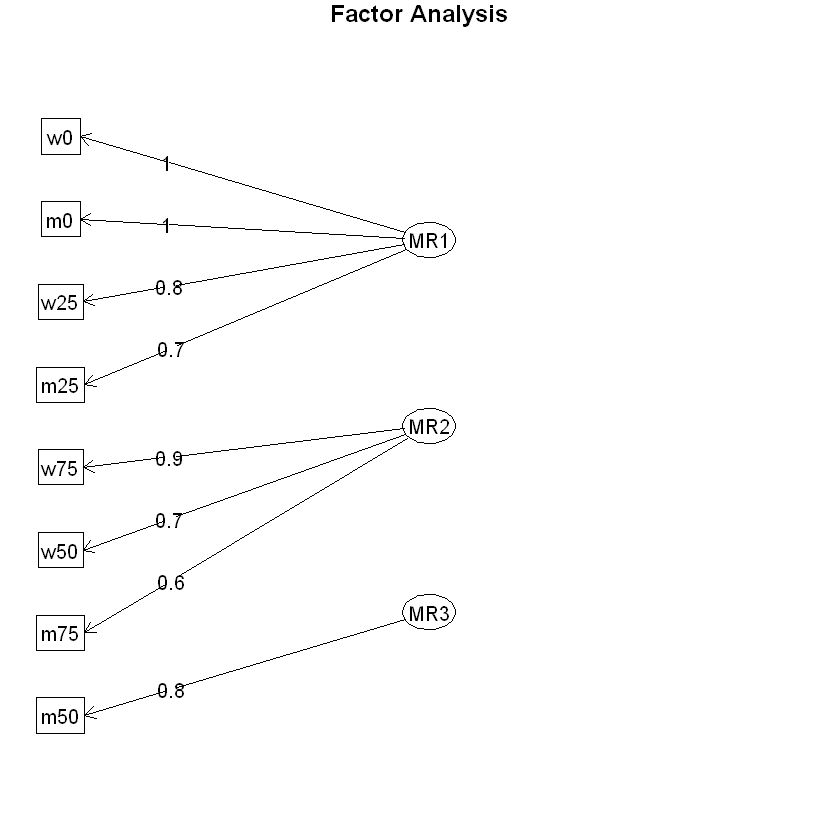

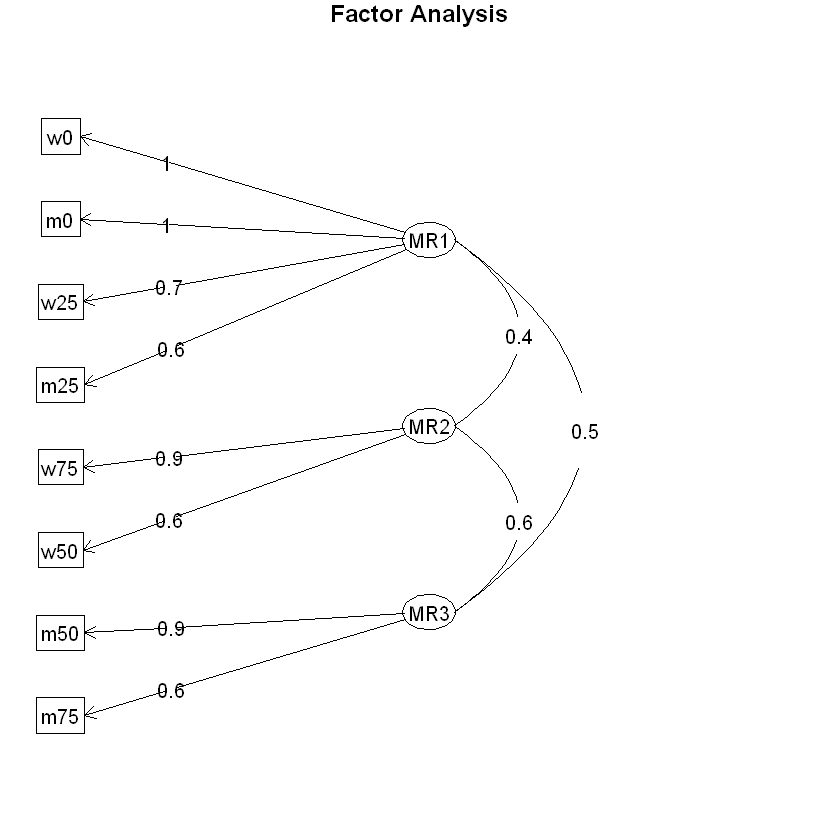

In [11]:
library(psych)
library(GPArotation)
fact_model3 <- fa(dat[, -1], nfactors = 3, 
rotate = "varimax")
fa.diagram(fact_model3)

fact_model4 <- fa(dat[, -1], nfactors = 3, 
rotate = "oblimin")

fa.diagram(fact_model4)

<hr> <hr>

#### Ex. II

In [25]:
colName2 <- read_table(file = file.choose(), 
col_names = F, col_type = cols("c")) %>% .$X1

cordat <- read_table(file = file.choose(), 
col_names = F) %>% setNames(colName2) %>% 
mutate(drug = colName2) %>%
column_to_rownames(var = "drug") %>%
mutate(drug = NULL) %>% .[, nrow(.):1] %>% t




── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double()
)



In [15]:
cordat

,drug-store-medication,cocaine,heroin,inhalants,hallucinogenics,tranquillizers,amphetamine,marijuana,hashish,cigarettes,liquor,beer,wine
wine,11,5,7,18,7,14,18,36,24,42,58,62,100
beer,10,7,6,20,9,15,20,44,32,45,60,100,62
liquor,12,12,10,26,14,26,29,48,37,44,100,60,58
cigarettes,9,11,8,24,10,20,24,51,30,100,44,45,42
hashish,16,30,22,30,37,38,47,53,100,30,37,32,24
marijuana,15,19,15,30,20,32,39,100,53,51,48,44,36
amphetamine,23,28,31,39,51,55,100,39,47,24,29,20,18
tranquillizers,22,35,36,32,37,100,55,32,38,20,26,15,14
hallucinogenics,23,28,32,34,100,37,51,20,37,10,14,9,7
inhalants,31,27,29,100,34,32,39,30,30,24,26,20,18


In [30]:
f <- function(x) x * 1/100
library(corrplot)

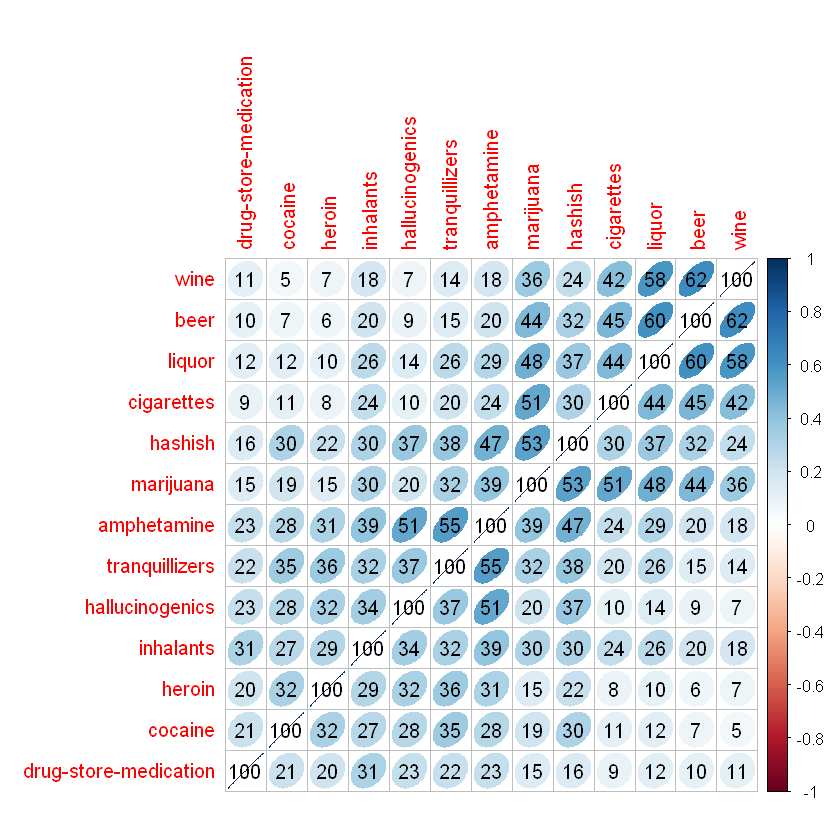

In [31]:
cordat %>% f %>%
corrplot(method = "ellipse", type = "full", is.corr = T, 
col.lim = c(-1, 1), p.mat = cordat, insig = "p-value"
)

In [34]:
1/100 * cordat[nrow(cordat):1, ] -> cor_mat2
cor_mat2

,drug-store-medication,cocaine,heroin,inhalants,hallucinogenics,tranquillizers,amphetamine,marijuana,hashish,cigarettes,liquor,beer,wine
drug-store-medication,1.00,0.21,0.20,0.31,0.23,0.22,0.23,0.15,0.16,0.09,0.12,0.10,0.11
cocaine,0.21,1.00,0.32,0.27,0.28,0.35,0.28,0.19,0.30,0.11,0.12,0.07,0.05
heroin,0.20,0.32,1.00,0.29,0.32,0.36,0.31,0.15,0.22,0.08,0.10,0.06,0.07
inhalants,0.31,0.27,0.29,1.00,0.34,0.32,0.39,0.30,0.30,0.24,0.26,0.20,0.18
hallucinogenics,0.23,0.28,0.32,0.34,1.00,0.37,0.51,0.20,0.37,0.10,0.14,0.09,0.07
tranquillizers,0.22,0.35,0.36,0.32,0.37,1.00,0.55,0.32,0.38,0.20,0.26,0.15,0.14
amphetamine,0.23,0.28,0.31,0.39,0.51,0.55,1.00,0.39,0.47,0.24,0.29,0.20,0.18
marijuana,0.15,0.19,0.15,0.30,0.20,0.32,0.39,1.00,0.53,0.51,0.48,0.44,0.36
hashish,0.16,0.30,0.22,0.30,0.37,0.38,0.47,0.53,1.00,0.30,0.37,0.32,0.24
cigarettes,0.09,0.11,0.08,0.24,0.10,0.20,0.24,0.51,0.30,1.00,0.44,0.45,0.42


In [43]:
sapply(1:6, function(nf){
factanal(covmat = cor_mat2, factors = nf,
method = "mle", n.obs = 1634)$PVAL %>% formatC(format = "g")})

factanal(covmat = cor_mat2, factors = 6,
method = "mle", n.obs = 1634)



objective   objective   objective   objective   objective   objective 
        "0" "9.988e-70" "2.014e-28" "1.028e-11" "4.079e-06"    "0.1721"


Call:
factanal(factors = 6, covmat = cor_mat2, n.obs = 1634, method = "mle")

Uniquenesses:
drug-store-medication               cocaine                heroin 
                0.791                 0.687                 0.661 
            inhalants       hallucinogenics        tranquillizers 
                0.523                 0.620                 0.514 
          amphetamine             marijuana               hashish 
                0.005                 0.318                 0.013 
           cigarettes                liquor                  beer 
                0.564                 0.417                 0.369 
                 wine 
                0.370 

Loadings:
                      Factor1 Factor2 Factor3 Factor4 Factor5 Factor6
drug-store-medication          0.256                   0.363         
cocaine                        0.513           0.130   0.159         
heroin                         0.541                   0.188         
inhalants              0.164   0.3

In [65]:
pfun2 <- function(nf){
    model <- factanal(covmat = cor_mat2, factors = nf, 
    n.obs = 1634, method = "ml")
    est <- tcrossprod(model$loadings) + diag(model$uniquenesses)
    ret <- round(cor_mat2 - est, 3)
    colnames(ret) <- rownames(ret) <- rownames(cor_mat2)
    return(ret)
}

pfun2(6) %>% round(4)

,drug-store-medication,cocaine,heroin,inhalants,hallucinogenics,tranquillizers,amphetamine,marijuana,hashish,cigarettes,liquor,beer,wine
drug-store-medication,0.000,0.012,-0.016,0.003,-0.001,0.005,0,0.008,0,-0.019,-0.010,0.000,0.011
cocaine,0.012,0.000,0.003,-0.004,-0.007,0.000,0,-0.003,0,0.008,-0.005,0.006,-0.004
heroin,-0.016,0.003,0.000,0.000,0.018,-0.003,0,0.005,0,-0.001,-0.018,0.004,0.010
inhalants,0.003,-0.004,0.000,0.000,-0.003,0.001,0,-0.005,0,0.008,0.013,-0.004,-0.006
hallucinogenics,-0.001,-0.007,0.018,-0.003,0.000,-0.007,0,0.002,0,-0.001,-0.005,0.007,-0.003
tranquillizers,0.005,0.000,-0.003,0.001,-0.007,0.000,0,-0.003,0,0.000,0.020,-0.009,-0.005
amphetamine,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0,0.000,0.000,0.000,0.000
marijuana,0.008,-0.003,0.005,-0.005,0.002,-0.003,0,0.000,0,0.002,0.002,0.001,-0.003
hashish,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0,0.000,0.000,0.000,0.000
cigarettes,-0.019,0.008,-0.001,0.008,-0.001,0.000,0,0.002,0,0.000,-0.015,0.000,0.010
